In [1]:
from source import *

data = Dataset()
data_cleaner = DataCleaning()
data_selector = DataSelection()
plotter = DataPlot()

# Dataset

In [13]:
# load data
print('[Load Data]')
df = data.load_csv('income.csv')
print(df.head())
print(df.shape)

# scale data
print('[Scale Data]')
new_df = data.scale(df, 10, 100)
print(new_df.head())
print(new_df.shape)


[Load Data]
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  
(48842, 7)
[Scale Data]
    age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
10   37  280464             10             0             0              80   
11   30  141297             13             0             0              40   
12   23  122272             13             0             0              30   
13   32  205019             12             0             0              50   
14 

# Data Selection

In [3]:
feature = data_cleaner.delete_by_columns(df, df.columns[-1])
target = pd.DataFrame(df[df.columns[-1]], columns=[df.columns[-1]])

In [4]:
print(feature.shape)
feature.head()

(48842, 6)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [5]:
print(target.shape)
target.head()

(48842, 1)


,income_level
0,0
1,0
2,0
3,0
4,0


In [6]:
data_selector.recursive(feature, target)

,Columns,Selection,Ranking
0,age,True,1
1,fnlwgt,True,1
2,education_num,True,1
3,capital_gain,True,1
4,capital_loss,True,1
5,hours_per_week,True,1


In [7]:
data_selector.embedded(feature, target)

,Columns,Coefficient Estimate
0,age,1.024284e-03
1,fnlwgt,-8.860437e-09
2,education_num,0.000000e+00
3,capital_gain,1.282161e-05
4,capital_loss,1.549505e-04
5,hours_per_week,3.366224e-04


In [8]:
data_selector.random_forest(feature, target)

/home/shokhbozbek/intern/feature_engineering/source.py:168: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, Y)


,Columns,Importance
0,age,0.193991
1,fnlwgt,0.391172
2,education_num,0.113515
3,capital_gain,0.164422
4,capital_loss,0.054823
5,hours_per_week,0.082078


In [9]:
data_selector.varieance_threshold(df, threshold=3)

,Columns,Threshold
0,age,True
1,fnlwgt,True
2,education_num,True
3,capital_gain,True
4,capital_loss,True
5,hours_per_week,True
6,income_level,False


In [10]:
data_selector.kbest(feature, target, k=3)

,Columns,Scores
0,age,1.260852e+04
1,fnlwgt,1.153938e+05
2,education_num,3.543889e+03
3,capital_gain,1.250099e+08
4,capital_loss,1.973739e+06
5,hours_per_week,9.617939e+03


In [11]:
data_selector.percentile(feature, target)

,Columns,Scores
0,age,1.260852e+04
1,fnlwgt,1.153938e+05
2,education_num,3.543889e+03
3,capital_gain,1.250099e+08
4,capital_loss,1.973739e+06
5,hours_per_week,9.617939e+03


"\nimage will not be displayed in backend\nit is showing as it is in jupyter\nthe plotted image is saved as 'test.png'\n"

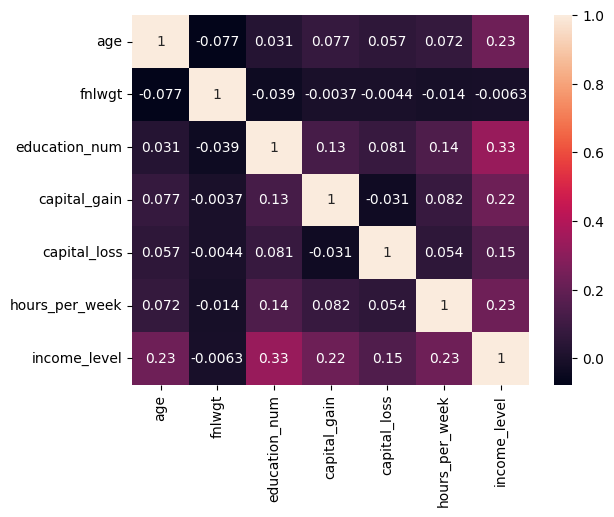

In [12]:
plotter.correlation(df, img_name='test.png')
"""
image will not be displayed in backend
it is showing as it is in jupyter
the plotted image is saved as 'test.png'
"""